Using cache found in C:\Users\femik/.cache\torch\hub\intel-isl_MiDaS_master
c:\Users\femik\anaconda3\Lib\site-packages\timm\models\_factory.py:126: UserWarning: Mapping deprecated model name vit_base_resnet50_384 to current vit_base_r50_s16_384.orig_in21k_ft_in1k.
  model = create_fn(
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v3/dpt_hybrid_384.pt" to C:\Users\femik/.cache\torch\hub\checkpoints\dpt_hybrid_384.pt
100%|██████████| 470M/470M [00:06<00:00, 77.2MB/s] 


PyTourch using CPU


Using cache found in C:\Users\femik/.cache\torch\hub\intel-isl_MiDaS_master


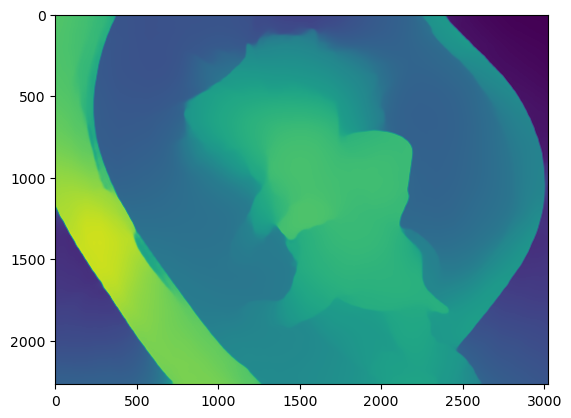

In [7]:
import cv2
import torch
import matplotlib.pyplot as plt

# Load a model (see https://github.com/intel-isl/MiDaS/#Accuracy for an overview)
# model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
# model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

# Move model to GPU if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("PyTourch using CUDA")
else:
    device = torch.device("cpu")
    print("PyTourch using CPU")

midas.to(device)
midas.eval()

# Load transforms to resize and normalize the image for large or small model
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

# Load image and apply transforms
img = cv2.imread("data/example.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)

# Predict and resize to original resolution
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

# Show result
plt.imshow(output)

In [ ]:
from ultralytics import YOLO
from PIL import Image
import depth_pro
import glob

# Load a model
model = YOLO("yolo11n.pt")

# Train the model
# train_results = model.train(
#     data="coco8.yaml",  # path to dataset YAML
#     epochs=100,  # number of training epochs
#     imgsz=640,  # training image size
#     device="cpu",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
# )

# Evaluate model performance on the validation set
# metrics = model.val()

# Perform object detection on an image
results = model("/datasets/[AC]_*.*")
results[0].show()
print(results[0])